<a href="https://colab.research.google.com/github/BFCC/BFCC.github.io/blob/main/Calabresi_Word2Vectors_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import random

from gensim.models import Word2Vec

from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

In [4]:
file = open("/content/hunger_games-1.txt", 'r').read()

In [5]:
for char in ["\n", "\r", "\d", "\t"]:
    file = file.replace(char, " ")

In [6]:
print(file[:100])

The Second Book of THE HUNGER GAMES     New York Times Bestsel ling Author   SUZHNNE  COLLINS     PA


In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
def sample_clean_text(text: str):
    # step 1: tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # step 2: tokenize each sentence into words
    tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

    # step 3: convert each word to lowercase
    tokenized_text = [[word.lower() for word in sent] for sent in tokenized_sentences]

    # return your tokens
    return tokenized_text

# call the function
tokens = sample_clean_text(text = file)

# check
print(tokens[:10])


[['the', 'second', 'book', 'of', 'the', 'hunger', 'games', 'new', 'york', 'times', 'bestsel', 'ling', 'author', 'suzhnne', 'collins', 'parti', '``', 'the', 'spark', "''", '2', '|', 'p', 'a', 'g', 'e', 'catching', 'fire', '-', 'suzanne', 'collins', 'i', 'clasp', 'the', 'flask', 'between', 'my', 'hands', 'even', 'though', 'the', 'warmth', 'from', 'the', 'tea', 'has', 'long', 'since', 'leached', 'into', 'the', 'frozen', 'air', '.'], ['my', 'muscles', 'are', 'clenched', 'tight', 'against', 'the', 'cold', '.'], ['if', 'a', 'pack', 'of', 'wild', 'dogs', 'were', 'to', 'appear', 'at', 'this', 'moment', ',', 'the', 'odds', 'of', 'scaling', 'a', 'tree', 'before', 'they', 'attacked', 'are', 'not', 'in', 'my', 'favor', '.'], ['i', 'should', 'get', 'up', ',', 'move', 'around', ',', 'and', 'work', 'the', 'stiffness', 'from', 'my', 'limbs', '.'], ['but', 'instead', 'i', 'sit', ',', 'as', 'motionless', 'as', 'the', 'rock', 'beneath', 'me', ',', 'while', 'the', 'dawn', 'begins', 'to', 'lighten', 'the',

In [12]:
model = Word2Vec(tokens,vector_size=100)

In [13]:
model.wv.key_to_index

{'.': 0,
 ',': 1,
 'the': 2,
 'i': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'of': 7,
 '``': 8,
 "''": 9,
 "'s": 10,
 'it': 11,
 'in': 12,
 'my': 13,
 'he': 14,
 'that': 15,
 'but': 16,
 "n't": 17,
 'me': 18,
 '?': 19,
 'on': 20,
 'with': 21,
 'you': 22,
 'we': 23,
 'for': 24,
 'is': 25,
 'peeta': 26,
 'his': 27,
 'be': 28,
 'as': 29,
 'do': 30,
 'at': 31,
 'have': 32,
 'they': 33,
 'says': 34,
 'from': 35,
 'out': 36,
 'what': 37,
 'him': 38,
 'so': 39,
 'her': 40,
 'up': 41,
 'can': 42,
 'fire': 43,
 'was': 44,
 'she': 45,
 'not': 46,
 'this': 47,
 'no': 48,
 'if': 49,
 'there': 50,
 'catching': 51,
 'are': 52,
 'one': 53,
 'collins': 54,
 'all': 55,
 '-': 56,
 'suzanne': 57,
 'p': 58,
 'g': 59,
 'e': 60,
 '|': 61,
 "'m": 62,
 'know': 63,
 'say': 64,
 'about': 65,
 'into': 66,
 'when': 67,
 'us': 68,
 'haymitch': 69,
 'just': 70,
 'finnick': 71,
 'will': 72,
 'them': 73,
 'back': 74,
 'has': 75,
 'think': 76,
 'then': 77,
 'by': 78,
 'see': 79,
 'an': 80,
 "'re": 81,
 'even': 82,
 'like': 83

In [14]:
model.wv.get_vector("capitol", norm=True)

array([-5.03075868e-02,  4.29642498e-02,  1.09319009e-01, -6.39946312e-02,
        6.72787726e-02, -1.35384783e-01,  3.10774185e-02,  2.24097237e-01,
       -1.46704376e-01, -8.62963572e-02, -9.79211181e-02, -1.22274175e-01,
       -5.82254566e-02,  5.84677979e-02, -3.48229855e-02, -6.56906068e-02,
       -1.24946395e-02,  2.88667269e-02, -5.40061705e-02, -2.21981198e-01,
       -1.46050565e-02,  2.42323847e-03,  1.01350591e-01, -1.48636892e-01,
        6.85994998e-02, -4.94532883e-02, -8.38831961e-02,  9.01364535e-03,
       -1.23761743e-01, -1.16595933e-02,  1.36320546e-01,  1.72867049e-02,
        6.98242337e-02, -1.22722261e-01,  2.46940311e-02,  9.38809291e-02,
        6.13100715e-02, -5.62896989e-02, -5.57111204e-03, -1.76649541e-01,
        5.76008260e-02, -1.07308812e-01, -4.86704148e-02, -4.35181335e-02,
        1.62638709e-01,  7.38659355e-06, -1.30907089e-01, -7.16614500e-02,
        4.96399365e-02,  6.89189276e-03,  1.07025497e-01, -1.65888503e-01,
       -1.18920542e-02, -

In [15]:
model.wv.most_similar('capitol')

[('one', 0.996006190776825),
 ('arena', 0.9955968856811523),
 ('end', 0.9928415417671204),
 ('last', 0.9879619479179382),
 ('has', 0.9847694635391235),
 ('year', 0.9838284850120544),
 ('same', 0.9837583303451538),
 ('night', 0.9829901456832886),
 ('some', 0.9825552105903625),
 ('us', 0.9823409914970398)]

one, arena, end, last, has

In [16]:
model = Word2Vec(tokens,vector_size=50)

In [17]:
model.wv.key_to_index

{'.': 0,
 ',': 1,
 'the': 2,
 'i': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'of': 7,
 '``': 8,
 "''": 9,
 "'s": 10,
 'it': 11,
 'in': 12,
 'my': 13,
 'he': 14,
 'that': 15,
 'but': 16,
 "n't": 17,
 'me': 18,
 '?': 19,
 'on': 20,
 'with': 21,
 'you': 22,
 'we': 23,
 'for': 24,
 'is': 25,
 'peeta': 26,
 'his': 27,
 'be': 28,
 'as': 29,
 'do': 30,
 'at': 31,
 'have': 32,
 'they': 33,
 'says': 34,
 'from': 35,
 'out': 36,
 'what': 37,
 'him': 38,
 'so': 39,
 'her': 40,
 'up': 41,
 'can': 42,
 'fire': 43,
 'was': 44,
 'she': 45,
 'not': 46,
 'this': 47,
 'no': 48,
 'if': 49,
 'there': 50,
 'catching': 51,
 'are': 52,
 'one': 53,
 'collins': 54,
 'all': 55,
 '-': 56,
 'suzanne': 57,
 'p': 58,
 'g': 59,
 'e': 60,
 '|': 61,
 "'m": 62,
 'know': 63,
 'say': 64,
 'about': 65,
 'into': 66,
 'when': 67,
 'us': 68,
 'haymitch': 69,
 'just': 70,
 'finnick': 71,
 'will': 72,
 'them': 73,
 'back': 74,
 'has': 75,
 'think': 76,
 'then': 77,
 'by': 78,
 'see': 79,
 'an': 80,
 "'re": 81,
 'even': 82,
 'like': 83

In [18]:
model.wv.get_vector("capitol", norm=True)

array([ 0.00109106, -0.0023503 , -0.13362852,  0.06286085, -0.03964519,
       -0.1619684 ,  0.24551071,  0.29762253, -0.1813767 , -0.01641329,
        0.05592477, -0.33369148,  0.10004447,  0.14033175, -0.07101355,
        0.22367622,  0.14349946,  0.01611727, -0.29682976, -0.16377619,
        0.10285797,  0.1169996 ,  0.22059748,  0.01162049,  0.17477931,
        0.02738389, -0.06246125, -0.03165441, -0.1907401 ,  0.14228158,
        0.0708275 ,  0.022447  , -0.10862686,  0.01605876, -0.17840004,
        0.09268324,  0.22899377,  0.01424712, -0.00163802, -0.06527666,
        0.14449425, -0.04642223, -0.03536096, -0.03662717,  0.18810058,
        0.15118021,  0.05105192, -0.25503558, -0.00362775,  0.0316737 ],
      dtype=float32)

In [19]:
model.wv.most_similar('capitol')

[('arena', 0.9952132105827332),
 ('one', 0.9913612604141235),
 ('us', 0.9904959201812744),
 ('last', 0.9899739623069763),
 ('night', 0.9890554547309875),
 ('year', 0.9852132797241211),
 ('rest', 0.9847242832183838),
 ('way', 0.9847191572189331),
 ('power', 0.9840673804283142),
 ('has', 0.9836565256118774)]

arena, one, us, last, night.  Yes they changed!

In [20]:
model = Word2Vec(tokens,vector_size=100)

In [21]:
model.wv.key_to_index

{'.': 0,
 ',': 1,
 'the': 2,
 'i': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'of': 7,
 '``': 8,
 "''": 9,
 "'s": 10,
 'it': 11,
 'in': 12,
 'my': 13,
 'he': 14,
 'that': 15,
 'but': 16,
 "n't": 17,
 'me': 18,
 '?': 19,
 'on': 20,
 'with': 21,
 'you': 22,
 'we': 23,
 'for': 24,
 'is': 25,
 'peeta': 26,
 'his': 27,
 'be': 28,
 'as': 29,
 'do': 30,
 'at': 31,
 'have': 32,
 'they': 33,
 'says': 34,
 'from': 35,
 'out': 36,
 'what': 37,
 'him': 38,
 'so': 39,
 'her': 40,
 'up': 41,
 'can': 42,
 'fire': 43,
 'was': 44,
 'she': 45,
 'not': 46,
 'this': 47,
 'no': 48,
 'if': 49,
 'there': 50,
 'catching': 51,
 'are': 52,
 'one': 53,
 'collins': 54,
 'all': 55,
 '-': 56,
 'suzanne': 57,
 'p': 58,
 'g': 59,
 'e': 60,
 '|': 61,
 "'m": 62,
 'know': 63,
 'say': 64,
 'about': 65,
 'into': 66,
 'when': 67,
 'us': 68,
 'haymitch': 69,
 'just': 70,
 'finnick': 71,
 'will': 72,
 'them': 73,
 'back': 74,
 'has': 75,
 'think': 76,
 'then': 77,
 'by': 78,
 'see': 79,
 'an': 80,
 "'re": 81,
 'even': 82,
 'like': 83

In [22]:
model.wv.similarity('katniss', 'girl')

0.86787033

In [23]:
model.wv.similarity('peeta', 'home')

0.9587727

In [39]:
def reduce_dimensions(model):
    num_dimensions = 2

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings


    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)


In [40]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)


    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

I can't see anything  . . . .

In [26]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [29]:
#establish an empty dictionary
embeddings_dict = {}

#open the file and read it into the dictionary
with open("/content/glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [30]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word:
                  spatial.distance.euclidean(embeddings_dict[word], embedding))

In [31]:
print(find_closest_embeddings(
    embeddings_dict["dog"]
)[:20])

['dog', 'cat', 'dogs', 'puppy', 'pet', 'horse', 'pig', 'cats', 'animal', 'rabbit', 'boy', 'goat', 'monkey', 'rat', 'hound', 'breed', 'canine', 'sled', 'pets', 'puppies']


In [32]:
print(find_closest_embeddings(
    embeddings_dict["cat"]
)[:20])

['cat', 'dog', 'rabbit', 'cats', 'monkey', 'puppy', 'pet', 'dogs', 'rat', 'mouse', 'spider', 'elephant', 'ghost', 'pig', 'monster', 'ape', 'parrot', 'squirrel', 'kitten', 'hound']


In [33]:
print(find_closest_embeddings(
    embeddings_dict["dog"] + embeddings_dict["cat"]
)[:20])

['dog', 'cat', 'dogs', 'pet', 'rabbit', 'horse', 'puppy', 'cats', 'monkey', 'animal', 'mouse', 'boy', 'pig', 'rat', 'bird', 'baby', 'duck', 'snake', 'cow', 'goat']


In [34]:
print(find_closest_embeddings(
    embeddings_dict["dog"] + embeddings_dict["cat"] + embeddings_dict["pet"]
)[:20])

['dog', 'pet', 'cat', 'dogs', 'animal', 'cats', 'pets', 'animals', 'puppy', 'baby', 'rabbit', 'mouse', 'cow', 'monkey', 'bird', 'horse', 'pig', 'rat', 'boy', 'duck']


In [35]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

In [36]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X[:1000])

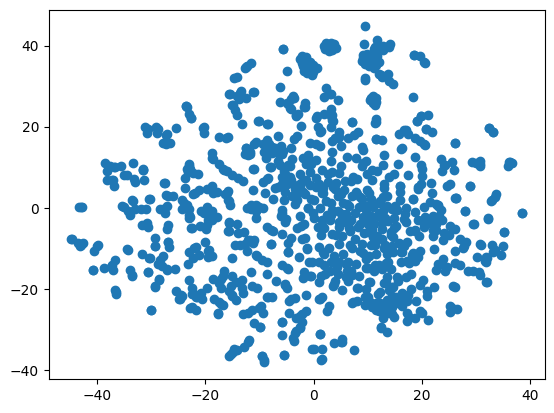

In [37]:
plt.scatter(Y[:, 0], Y[:, 1])

wow!

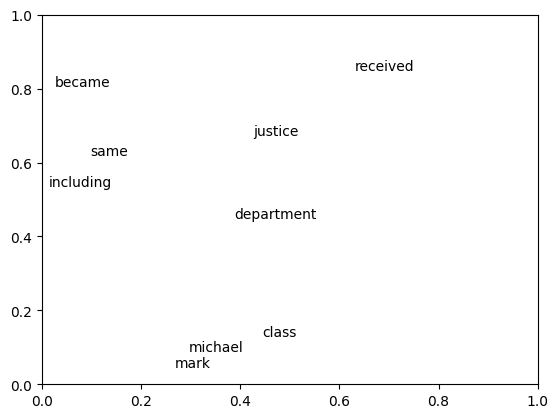

In [38]:
for label, x, y in zip(words, X[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()